## some useful widgets, magics and tricks in notebooks

but they are not working
references:
https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/
https://github.com/jupyter-widgets/ipywidgets/issues/2220


In [1]:
### pass variables between notebooks with %store

In [3]:
data = "this is some data that is passed to other notebooks, maybe even with different language"
%store data

# delete data variable in this notebook
del data


Stored 'data' (str)


### save code and retrieve in another notebook

In [4]:
%%writefile _imports.py

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


Writing _imports.py


to retrieve the code saved to _imports.py, use %pycat _imports.py

-----------------------------------------

In [8]:
from ipywidgets import widgets
from IPython.display import display

In [9]:
text = widgets.Text()

display(text)

def handle_submit(sender):
    print(text.value)

text.on_submit(handle_submit)

Text(value='')

In [10]:
button = widgets.Button(description = "Click me!!!")
display(button)
a = 123
def on_button_clicked(sender):
    print("you clicked the button")
    print(a)
    
button.on_click(on_button_clicked)

Button(description='Click me!!!', style=ButtonStyle())

you clicked the button
123
you clicked the button
123
you clicked the button
123


In [11]:
%matplotlib notebook 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import widget, Text

In [12]:
plt.style.use('ggplot')
 
NUMBER_OF_PINGS = 4
 
# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

 

Text(value='', description='Domain to ping')

Domain gave error on pinging


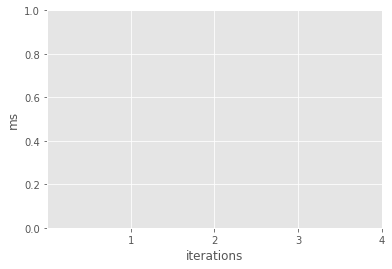

In [13]:
# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()
 

In [14]:
# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)
 
# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")
 
# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)
 
# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()
 
button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()

HBox()

## magic commands

In [1]:
%env

{'LC_ALL': 'en_US.UTF-8',
 'LANG': 'en_US.UTF-8',
 'JUPYTER_ENABLE_LAB': 'yes',
 'HOSTNAME': '6d2d935fcbcc',
 'JULIA_DEPOT_PATH': '/opt/julia',
 'JULIA_PKGDIR': '/opt/julia',
 'NB_UID': '1000',
 'CONDA_DIR': '/opt/conda',
 'PWD': '/home/jovyan',
 'HOME': '/home/jovyan',
 'DEBIAN_FRONTEND': 'noninteractive',
 'NB_USER': 'jovyan',
 'JULIA_VERSION': '1.0.0',
 'SHELL': '/bin/bash',
 'TERM': 'xterm-color',
 'SHLVL': '0',
 'LANGUAGE': 'en_US.UTF-8',
 'XDG_CACHE_HOME': '/home/jovyan/.cache/',
 'NB_GID': '100',
 'PATH': '/opt/conda/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin',
 'MINICONDA_VERSION': '4.5.11',
 'JPY_PARENT_PID': '7',
 'CLICOLOR': '1',
 'PAGER': 'cat',
 'GIT_PAGER': 'cat',
 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline'}

In [2]:
%history

%env
%history


In [3]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [5]:
%precision 2
print(0.1234567)

0.1234567


In [7]:
%pwd

'/home/jovyan/work'

In [8]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

In [9]:
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.82 µs


In [10]:
%whos

Interactive namespace is empty.


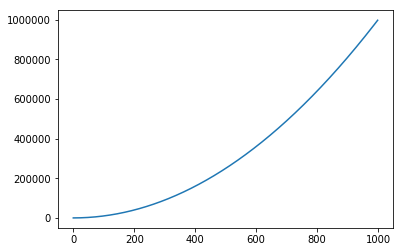

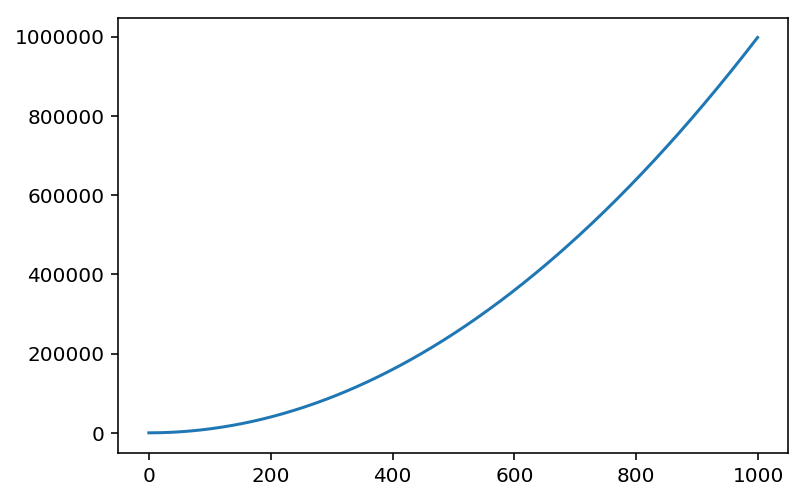

In [14]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt

x = range(1000)
y = [i ** 2 for i in x]
plt.plot(x,y)
plt.show(); 

%config InlineBackend.figure_format ='retina'
plt.plot(x,y)
plt.show();